In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sklearn.metrics as sm
%matplotlib inline

iris = datasets.load_iris()

In [2]:
x = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns=['Target'])

In [3]:
print (iris.target_names)

['setosa' 'versicolor' 'virginica']


In [4]:
print (iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
x.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
y.head()

,Target
0,0
1,0
2,0
3,0
4,0


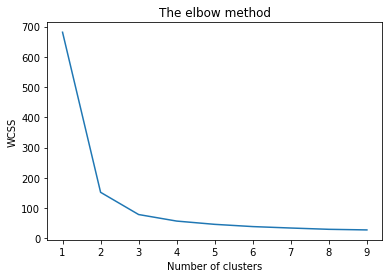

In [7]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
#'k-means++' selects initial cluster centres from data in a smart way

#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 10), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

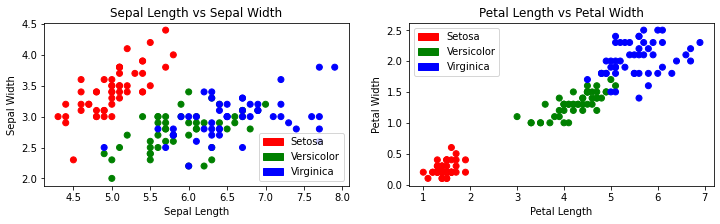

In [8]:
plt.figure(figsize=(12,3))
colors = np.array(['red', 'green', 'blue'])
iris_targets_legend = np.array(iris.target_names)
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')


plt.subplot(1, 2, 1)
plt.scatter(x['Sepal Length'], x['Sepal Width'], c=colors[y['Target']])
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1,2,2)
plt.scatter(x['Petal Length'], x['Petal Width'], c= colors[y['Target']])
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=1)

In [10]:
X_train.describe

<bound method NDFrame.describe of      Sepal Length  Sepal Width  Petal Length  Petal Width
118           7.7          2.6           6.9          2.3
18            5.7          3.8           1.7          0.3
4             5.0          3.6           1.4          0.2
45            4.8          3.0           1.4          0.3
59            5.2          2.7           3.9          1.4
..            ...          ...           ...          ...
133           6.3          2.8           5.1          1.5
137           6.4          3.1           5.5          1.8
72            6.3          2.5           4.9          1.5
140           6.7          3.1           5.6          2.4
37            4.9          3.6           1.4          0.1

[105 rows x 4 columns]>

In [11]:
iris_k_mean_model = KMeans(n_clusters=3)
iris_k_mean_model.fit(X_train)

KMeans(n_clusters=3)

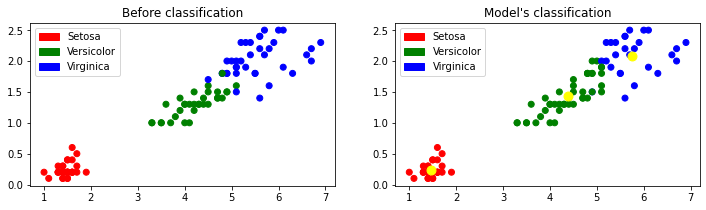

In [51]:
plt.figure(figsize=(12,3))

colors = np.array(['red', 'green', 'blue'])

predictedY = np.choose(iris_k_mean_model.labels_, [1, 0, 2]).astype(np.int64)

plt.subplot(1, 2, 1)
plt.scatter(X_train['Petal Length'], X_train['Petal Width'], c=colors[y_train['Target']])
plt.title('Before classification')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1, 2, 2)
plt.scatter(X_train['Petal Length'], X_train['Petal Width'], c=colors[predictedY])
plt.title("Model's classification")
plt.scatter(iris_k_mean_model.cluster_centers_[:, 2], iris_k_mean_model.cluster_centers_[:,3], s = 80, c = 'yellow', label = 'Centroids')
plt.legend(handles=[red_patch, green_patch, blue_patch])

In [13]:
sm.accuracy_score(predictedY, y_train['Target'])


0.8857142857142857

In [14]:
sm.confusion_matrix(predictedY, y_train['Target'])


array([[36,  0,  0],
       [ 0, 31, 11],
       [ 0,  1, 26]], dtype=int64)

In [15]:
print (iris_k_mean_model.labels_)


[2 1 1 1 0 1 1 2 2 2 2 0 0 2 0 1 0 0 1 1 2 1 0 2 0 0 2 0 1 0 0 2 0 2 0 1 1
 1 2 1 0 2 0 1 1 0 1 2 0 2 2 0 2 2 0 1 0 1 0 2 1 0 1 1 2 0 2 1 1 0 1 0 1 2
 0 1 2 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 2 0 2 0 0 2 0 2 1]


In [16]:
print (iris_k_mean_model.cluster_centers_)


[[5.89047619 2.73809524 4.38333333 1.43333333]
 [4.94166667 3.35277778 1.46944444 0.23333333]
 [6.8037037  3.08518519 5.75925926 2.08888889]]


In [37]:
iris_k_mean_model1 = KMeans(n_clusters=3)
iris_k_mean_model1.fit(X_val)

KMeans(n_clusters=3)

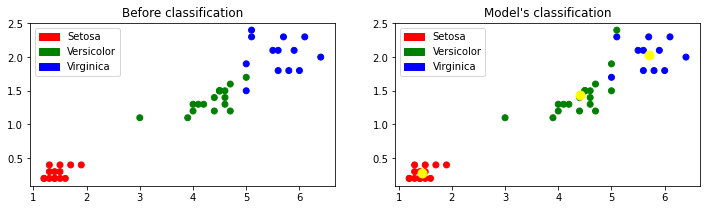

In [50]:
plt.figure(figsize=(12,3))

colors = np.array(['red', 'green', 'blue'])

predictedY1 = np.choose(iris_k_mean_model1.labels_, [1, 0, 2]).astype(np.int64)

plt.subplot(1, 2, 1)
plt.scatter(X_val['Petal Length'], X_val['Petal Width'], c=colors[y_val['Target']])
plt.title('Before classification')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1, 2, 2)
plt.scatter(X_val['Petal Length'], X_val['Petal Width'], c=colors[predictedY1])
plt.title("Model's classification")
plt.scatter(iris_k_mean_model1.cluster_centers_[:, 2], iris_k_mean_model1.cluster_centers_[:,3], s = 80, c = 'yellow', label = 'Centroids')

plt.legend(handles=[red_patch, green_patch, blue_patch])

In [40]:
sm.accuracy_score(predictedY1, y_val['Target'])


0.9111111111111111

In [41]:
sm.confusion_matrix(predictedY1, y_val['Target'])


array([[14,  0,  0],
       [ 0, 17,  3],
       [ 0,  1, 10]], dtype=int64)

In [52]:
print (iris_k_mean_model1.cluster_centers_)


[[5.925      2.77       4.415      1.435     ]
 [5.17142857 3.62142857 1.44285714 0.27857143]
 [6.96363636 3.04545455 5.7        2.02727273]]
